In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/Users/saikarthik/Desktop/xai /nasdq.csv", parse_dates=["Date"], index_col="Date")

df['Avg_Price'] = df[['Open', 'High', 'Low', 'Close']].mean(axis=1)

daily_avg = df['Avg_Price']

# Weekly Average Price
weekly_avg = df['Avg_Price'].resample('W').mean()

# Monthly Average Price
monthly_avg = df['Avg_Price'].resample('M').mean()

# Yearly Average Price
yearly_avg = df['Avg_Price'].resample('Y').mean()


In [27]:
daily_avg

Date
2010-01-04     6.707500
2010-01-05     6.706666
2010-01-06     6.750833
2010-01-07     6.705000
2010-01-08     6.703333
                ...    
2024-10-21    74.480001
2024-10-22    74.002501
2024-10-23    74.012501
2024-10-24    74.215000
2024-10-25    75.000000
Name: Avg_Price, Length: 3914, dtype: float64

In [28]:
weekly_avg

Date
2010-01-10     6.714667
2010-01-17     6.706667
2010-01-24     6.558833
2010-01-31     6.093167
2010-02-07     6.206833
                ...    
2024-09-29    73.363500
2024-10-06    72.820499
2024-10-13    72.002000
2024-10-20    73.502500
2024-10-27    74.342001
Freq: W-SUN, Name: Avg_Price, Length: 773, dtype: float64

In [29]:
monthly_avg

Date
2010-01-31     6.518333
2010-02-28     6.153542
2010-03-31     6.779710
2010-04-30     7.251553
2010-05-31     6.483939
                ...    
2024-06-30    59.312381
2024-07-31    63.062174
2024-08-31    69.042159
2024-09-30    72.770909
2024-10-31    73.194342
Freq: M, Name: Avg_Price, Length: 178, dtype: float64

In [30]:
yearly_avg

Date
2010-12-31     6.687713
2011-12-31     8.375444
2012-12-31     8.010495
2013-12-31    10.766913
2014-12-31    13.474893
2015-12-31    17.305836
2016-12-31    21.765558
2017-12-31    24.055688
2018-12-31    29.112208
2019-12-31    31.640117
2020-12-31    39.434452
2021-12-31    58.437944
2022-12-31    58.321686
2023-12-31    53.882225
2024-12-31    63.216359
Freq: A-DEC, Name: Avg_Price, dtype: float64

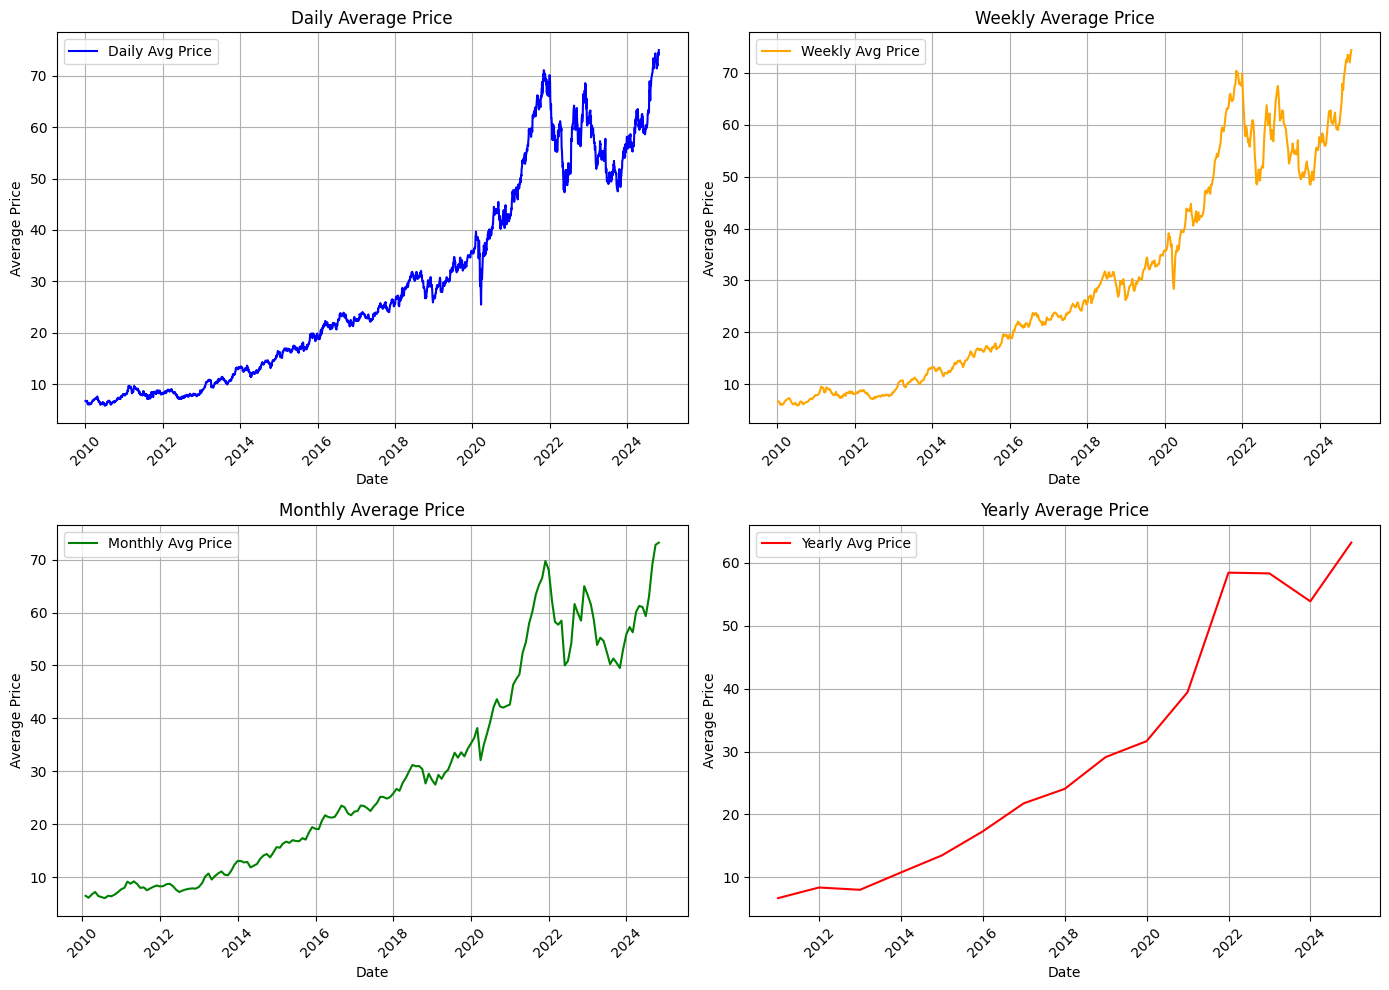

In [31]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting all average prices
plt.figure(figsize=(14, 10))

# Daily Average Price
plt.subplot(2, 2, 1)
plt.plot(daily_avg.index, daily_avg, label='Daily Avg Price', color='blue')
plt.title('Daily Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Weekly Average Price
plt.subplot(2, 2, 2)
plt.plot(weekly_avg.index, weekly_avg, label='Weekly Avg Price', color='orange')
plt.title('Weekly Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Monthly Average Price
plt.subplot(2, 2, 3)
plt.plot(monthly_avg.index, monthly_avg, label='Monthly Avg Price', color='green')
plt.title('Monthly Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Yearly Average Price
plt.subplot(2, 2, 4)
plt.plot(yearly_avg.index, yearly_avg, label='Yearly Avg Price', color='red')
plt.title('Yearly Average Price')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
